**ADHITHIYA MS <br>
Assignment for Research and Development / AI**

**STEP 1**

In [1]:
#Importing neccessary packages

import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

**STEP 2**

In [2]:
#Data loading process

data = pd.read_csv("/content/Data/xy_data.csv")
x_expected_value = data['x'].values
y_expected_value = data['y'].values

print(f"The total data points are {len(x_expected_value)}")
t_points = np.linspace(6, 60, len(x_expected_value))

The total data points are 1500


**STEP 3**

In [10]:
#Defining error function

def get_the_error(params, t, x_actual_value, y_actual_value):
    theta_deg, M_value, X_value = params
    theta_rad = np.deg2rad(theta_deg)
    exp_bit = np.exp(M_value * np.abs(t)) * np.sin(0.3 * t)
    x_predicted_value = (t * np.cos(theta_rad) - exp_bit * np.sin(theta_rad) + X_value)
    y_predicted_value = (42 + t * np.sin(theta_rad) + exp_bit * np.cos(theta_rad))
    error = np.sum(np.abs(x_actual_value - x_predicted_value) + np.abs(y_actual_value - y_predicted_value))
    return error

**STEP 4**

In [11]:
#Finding the parameters

bounds = [
    (0, 50),
    (-0.05, 0.05),
    (0, 100)
]
p0 = [
    25.0, 0.0, 50.0
    ]
print("Running the optimizer")
result = minimize(
    get_the_error,
    p0,
    args=(t_points, x_expected_value, y_expected_value),
    method='L-BFGS-B',
    bounds=bounds
)
if result.success:
    print(f"  Theta: {result.x[0]}")
    print(f"  M:           {result.x[1]}")
    print(f"  X:           {result.x[2]}")
else:
    print(f"\nOptimization failed{result.message}")

Running the optimizer
  Theta: 28.12085985212584
  M:           0.02139658866202911
  X:           54.90114993837505


**STEP 5**

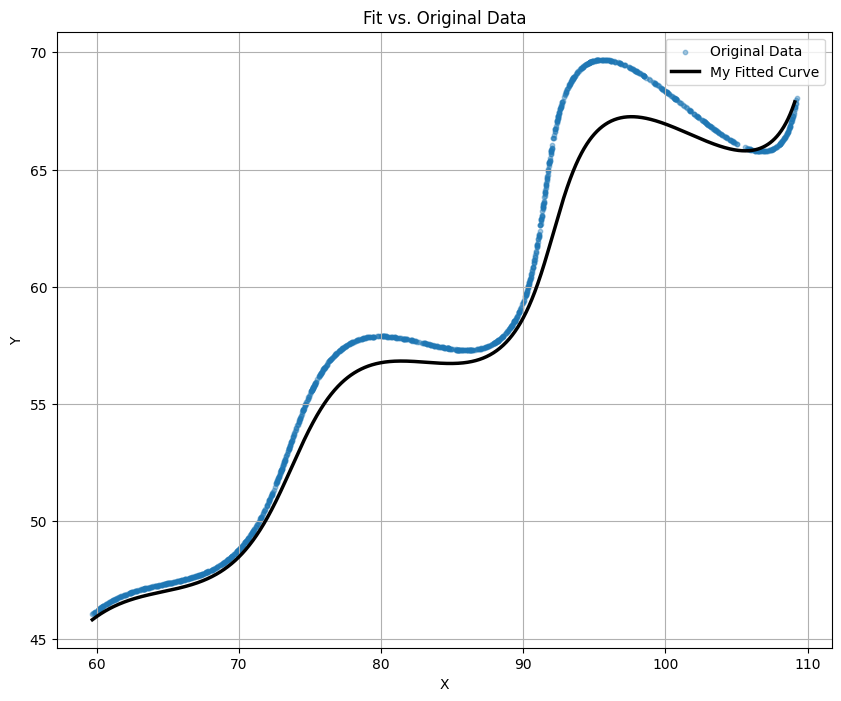

In [14]:
#Plot the Graph

best_params = result.x
best_theta_rad = np.deg2rad(best_params[0])
exp_bit_final = np.exp(best_params[1] * np.abs(t_points)) * np.sin(0.3 * t_points)

x_fit = (t_points * np.cos(best_theta_rad) - exp_bit_final * np.sin(best_theta_rad) + best_params[2])
y_fit = (42 + t_points * np.sin(best_theta_rad) + exp_bit_final * np.cos(best_theta_rad))

plt.figure(figsize=(10, 8))
plt.scatter(x_expected_value, y_expected_value, label='Original Data', alpha=0.4, s=10)
plt.plot(x_fit, y_fit, label='My Fitted Curve', color='black', linewidth=2.5)
plt.legend()
plt.title('Fit vs. Original Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

**STEP 6**

In [20]:
#Final String

final_theta_deg = result.x[0]
final_M_value = result.x[1]
final_X_value = result.x[2]

#Convert theta to RADS for the formula
final_theta_rad = np.deg2rad(final_theta_deg)
string = (
    f"\\left(t*\\cos({final_theta_rad:.5f})"
    f"-e^{{{final_M_value:.5f}\\left|t\\right|}}"
    f"\\cdot\\sin(0.3t)\\sin({final_theta_rad:.5f})"
    f"\\ +{final_X_value:.5f},42+"
    f"\\ t*\\sin({final_theta_rad:.5f})"
    f"+e^{{{final_M_value:.5f}\\left|t\\right|}}"
    f"\\cdot\\sin(0.3t)\\cos({final_theta_rad:.5f})\\right)"
)

print("String  -- ",string)

String  --  \left(t*\cos(0.49080)-e^{0.02140\left|t\right|}\cdot\sin(0.3t)\sin(0.49080)\ +54.90115,42+\ t*\sin(0.49080)+e^{0.02140\left|t\right|}\cdot\sin(0.3t)\cos(0.49080)\right)
